# SINGLE STEP

In [1]:
import pandas as pd
import numpy as np

C:\Users\BALASAHEB MULE\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\BALASAHEB MULE\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\BALASAHEB MULE\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("E:\\1. Sem 3\\3. Results\\5. Apr New Data\\4. Two step model_dataset\\2StepTT1-3added\\Hdmodeldatasetfinal2stepsTT_F1-3DTF2meansStd.csv")
df

Bus_Stop_1  Bus_Stop_2  Bus_No_1  Bus_No_2  TT_L_1-3  Dwell_Time_L1  \
0              1           3       381      9526    159.54           8.46   
1              1           3      9526     20908    123.05           8.95   
2              1           3     20908     34197     99.28           8.72   
3              1           3     34197     48637    133.88           8.12   
4              1           3     48637     63874    134.01           8.99   
...          ...         ...       ...       ...       ...            ...   
3089          29          27     55212     70442    263.48          16.52   
3090          29          27     70442     85174    558.67          16.33   
3091          29          27     85174     99943    689.18          16.82   
3092          29          27     99943    114518    666.88          17.12   
3093          29          27    114518    128554    290.18          17.52   

      Bus_Stop_3  Time_Headway_1  Time_Headway_3  Mean_TT_F2  ...   ts  \
0              4      1186.00000      1150.00000   67.337500  ...  ts1   
1              4      1230.00000      1206.00000   67.337500  ...  ts1   
2              4      1187.00000      1221.00000   72.600000  ...  ts2   
3              4      1188.00000      1189.00000   89.352500  ...  ts3   
4              4      1207.00000      1229.00000   89.352500  ...  ts3   
...          ...             ...             ...         ...  ...  ...   
3089          28      1293.00000      1588.00000  242.612169  ...  ts5   
3090          28      1114.00000      1245.00000  293.551480  ...  ts6   
3091          28      1111.00000      1089.00000  236.427034  ...  ts7   
3092          28      1281.00000       904.70000  236.427034  ...  ts7   
3093          28      1227.72727      1227.72727  236.427034  ...  ts7   

      Travel_Time_F2  Travel_Time_F3   std_TT_F2  std_TT_F3 TT_F_1_3DTF2  \
0               65.0            67.0   11.455257  14.235874        123.1   
1               54.0            54.0   11.455257  14.235874         99.3   
2               76.0            66.0   21.573375  12.715097        133.9   
3               99.0            44.0   21.201983  14.686028        134.0   
4               97.0            68.0   21.201983  14.686028        156.3   
...              ...             ...         ...        ...          ...   
3089           311.0           264.0  177.994679  90.480340        558.7   
3090           377.0           329.0  133.943993  80.907296        689.2   
3091           368.0           316.0  129.925109  62.758048        666.9   
3092           156.0           151.7  129.925109  62.758048        290.2   
3093           156.0           151.7  129.925109  62.758048        290.8   

      std_TT_F1_3  mean_TT_F1_3  Travel_Time_L2  Time_Headway_2  
0       17.188293     99.672500            69.5      1173.00000  
1       17.188293     99.672500            56.1      1219.00000  
2       18.639615    125.950000            45.3      1209.00000  
3       22.774939    133.360000            67.9      1211.00000  
4       22.774939    133.360000            90.0      1205.00000  
...           ...           ...             ...             ...  
3089   213.870186    396.530000           166.5      1421.00000  
3090   167.367169    465.940909           294.7      1180.00000  
3091   147.796842    392.400000           360.2      1102.00000  
3092   147.796842    392.400000           350.9      1069.00000  
3093   147.796842    392.400000           138.5      1227.72727  

[3094 rows x 25 columns]

### LS SVM Single Step Headway Prediction

In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

X = df[['Bus_Stop_1', 'Bus_Stop_2', 'Travel_Time_L2', 'Dwell_Time_L1',
       'Dwell_Time_F1', 'Mean_TT_F2', 'mean_TH2','Time_Headway_1',
       'std_TT_F2']]
Y = df['Time_Headway_2']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

# Feature scaling (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# Define the LS SVM model
model = SVR(kernel='linear')

# Define the grid search parameters
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.1, 0.2, 0.5]  # Epsilon insensitive loss parameter
}
# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_result = grid_search.fit(X_train_scaled, Y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_result.best_params_)

# Make predictions on the test data using the best model
best_model = grid_result.best_estimator_
Y_pred = best_model.predict(X_test_scaled)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score:", r2)

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)
print("Adjusted R-squared Score:", adj_r2)
Y_pred_entire = best_model.predict(X_scaled)

r2_entire = r2_score(Y, Y_pred_entire)
print("R-squared Score on Entire Dataset:", r2_entire)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)


# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters:  {'C': 1, 'epsilon': 0.1}
R-squared Score: 0.9267048762877192
Adjusted R-squared Score: 0.9256216971195574
R-squared Score on Entire Dataset: 0.8456783960259611
Mean Squared Error: 1786.3474760582337
Root Mean Squared Error: 42.26520408158742
Mean Absolute Error: 20.74043157883655
Mean Absolute Percentage Error (MAPE): 1.7596117126797226


In [75]:
import pandas as pd

# Create DataFrame df_pred with 'Time_Headway_2' column
df_pred = pd.DataFrame(df['Time_Headway_2'])

# Add a new column 'Predicted_Time_Headway_2' with predicted values
df_pred['Predicted_Time_Headway_2'] = Y_pred_entire

# Print the first few rows of df_pred to verify
print(df_pred.head())

   Time_Headway_2  Predicted_Time_Headway_2
0          1173.0               1178.204896
1          1219.0               1230.608684
2          1209.0               1196.949154
3          1211.0               1197.226089
4          1205.0               1198.707689


### XG BOOST SINGLE STEP HEADWAY PREDICTION

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
R-squared Score: 0.9222727111922194
Adjusted R-squared Score: 0.9211240320472769
R-squared Score on Entire Dataset: 0.9200696275795144
Mean Squared Error: 1996.1691315157632
Root Mean Squared Error: 44.67850860890237
Mean Absolute Error: 24.549082538810076
Mean Absolute Percentage Error (MAPE): 2.0034989691740317


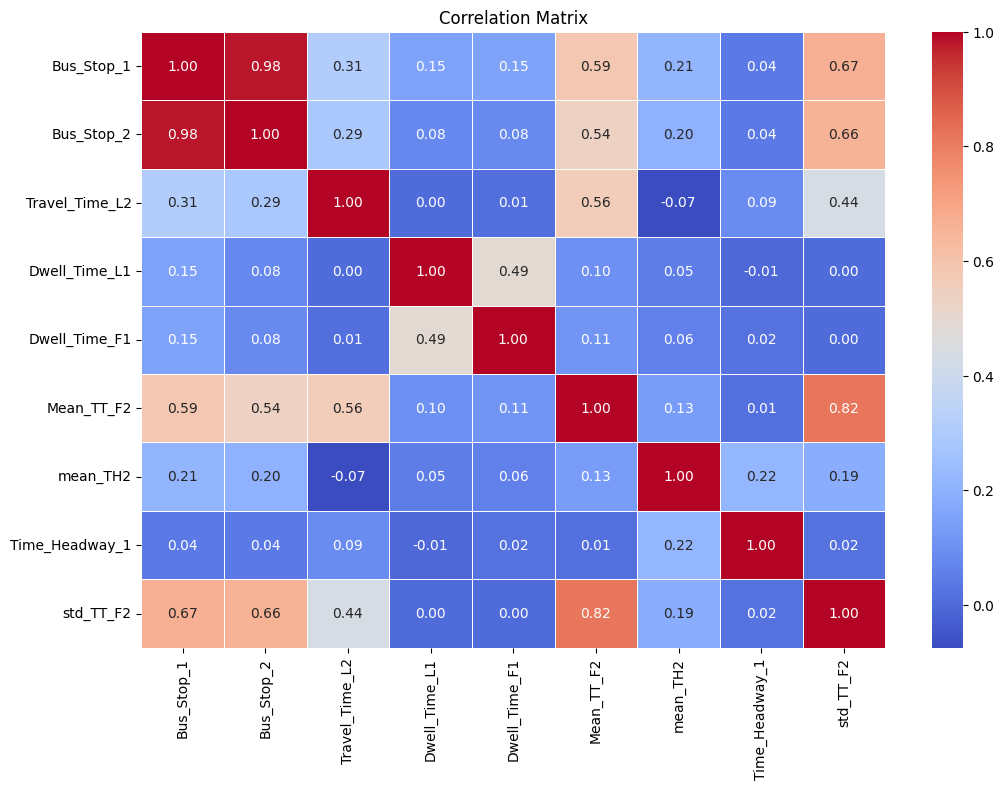

In [24]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Split the data into features (X) and target variable (Y)
X = df[['Bus_Stop_1', 'Bus_Stop_2', 'Travel_Time_L2', 'Dwell_Time_L1',
       'Dwell_Time_F1', 'Mean_TT_F2', 'mean_TH2','Time_Headway_1',
       'std_TT_F2']]
Y = df['Time_Headway_2']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test data using the best model
best_xgb_regressor = grid_search.best_estimator_
Y_pred = best_xgb_regressor.predict(X_test)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score:", r2)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)
print("Adjusted R-squared Score:", adj_r2)

# Make predictions on the entire dataset using the best model
Y_pred_entire = best_xgb_regressor.predict(X)

# Calculate R-squared (R2) score on the entire dataset
r2_entire = r2_score(Y, Y_pred_entire)
print("R-squared Score on Entire Dataset:", r2_entire)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Residual Analysis

# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [25]:
import pandas as pd

# Create DataFrame df_pred with 'Time_Headway_2' column
df_pred = pd.DataFrame(df['Time_Headway_2'])

# Add a new column 'Predicted_Time_Headway_2' with predicted values
df_pred['Predicted_Time_Headway_2'] = Y_pred_entire

# Print the first few rows of df_pred to verify
print(df_pred.head())


   Time_Headway_2  Predicted_Time_Headway_2
0          1173.0               1186.841431
1          1219.0               1227.859863
2          1209.0               1217.877686
3          1211.0               1204.996094
4          1205.0               1201.891846


In [26]:
df_pred

Time_Headway_2  Predicted_Time_Headway_2
0         1173.00000               1186.841431
1         1219.00000               1227.859863
2         1209.00000               1217.877686
3         1211.00000               1204.996094
4         1205.00000               1201.891846
...              ...                       ...
3089      1421.00000               1288.493408
3090      1180.00000               1127.626343
3091      1102.00000               1032.218994
3092      1069.00000               1184.730347
3093      1227.72727               1215.620239

[3094 rows x 2 columns]

In [27]:
df_pred.to_csv("E:\\1. Sem 3\\3. Results\\6. Final BB results apr 26th\\df_pred_BB.csv")

In [84]:
df_1step = pd.read_csv("E:\\1. Sem 3\\3. Results\\6. Final BB results apr 26th\\df_pred_BB.csv")
df_1step

Time_Headway_2  Predicted_Time_Headway_2  BB_actual  BB_pred
0               1173                      1187          0        0
1               1219                      1228          0        0
2               1209                      1218          0        0
3               1211                      1205          0        0
4               1205                      1202          0        0
...              ...                       ...        ...      ...
3089            1421                      1288          0        0
3090            1180                      1128          0        0
3091            1102                      1032          0        1
3092            1069                      1185          1        0
3093            1228                      1216          0        0

[3094 rows x 4 columns]

In [39]:
# Assuming df_1step is your DataFrame
count_of_ones = (df_1step['BB_actual'] == 1).sum()
print("Number of occurrences where BB_actual is 1:", count_of_ones)

Number of occurrences where BB_actual is 1: 359


In [40]:
# Assuming df_1step is your DataFrame
count_of_ones = (df_1step['BB_pred'] == 1).sum()
print("Number of occurrences where BB_actual is 1:", count_of_ones)

Number of occurrences where BB_actual is 1: 313


In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming df is your DataFrame containing 'BB_actual' and 'BB_pred' columns
# Calculate accuracy
accuracy = accuracy_score(df_1step['BB_actual'], df_1step['BB_pred'])
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(df_1step['BB_actual'], df_1step['BB_pred'])
print("Precision:", precision)

# Calculate recall
recall = recall_score(df_1step['BB_actual'], df_1step['BB_pred'])
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(df_1step['BB_actual'], df_1step['BB_pred'])
print("F1-score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(df_1step['BB_actual'], df_1step['BB_pred'])
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9612152553329024
Precision: 0.8817891373801917
Recall: 0.7688022284122563
F1-score: 0.8214285714285714
Confusion Matrix:
[[2698   37]
 [  83  276]]


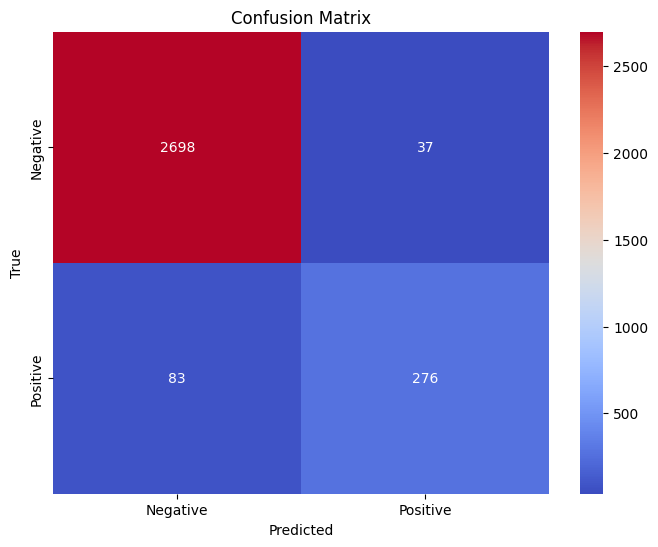

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix
conf_matrix = [[2698, 37],
               [83, 276]]

# Define class labels
class_labels = ['Negative', 'Positive']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'BB_actual' and 'BB_pred' columns
# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(df_1step['BB_actual'], df_1step['BB_pred'])

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(df_1step['BB_actual'], df_1step['BB_pred'])
print("AUC:", auc)

# Find the index of the threshold that maximizes Youden's J statistic
optimal_threshold_index = np.argmax(tpr - fpr)

# Get the optimal threshold value
optimal_threshold = thresholds[optimal_threshold_index]

# Plot ROC curve with optimal threshold point
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', label='Optimal Threshold', s=100)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

AUC: 0.8776369460160001


Average Precision: 0.7047475688690218


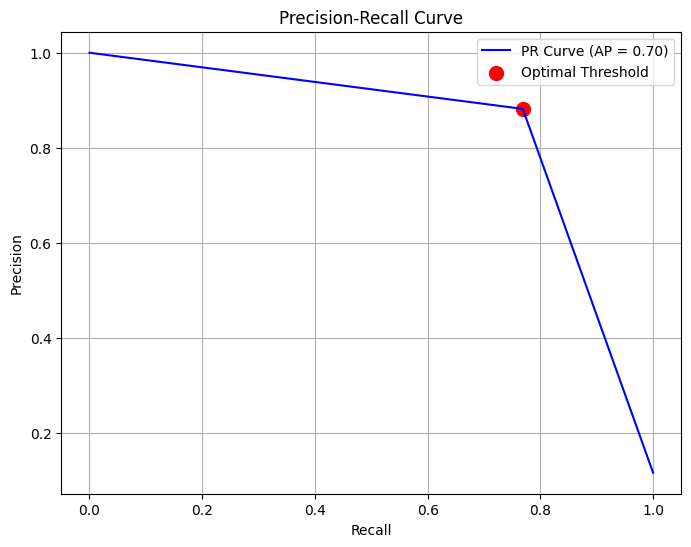

In [117]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'BB_actual' and 'BB_pred' columns
# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(df_1step['BB_actual'], df_1step['BB_pred'])

# Calculate average precision score
average_precision = average_precision_score(df_1step['BB_actual'], df_1step['BB_pred'])
print("Average Precision:", average_precision)

# Find the index of the threshold that maximizes precision-recall sum
optimal_threshold_index = np.argmax(precision + recall)

# Get the optimal threshold value
optimal_threshold = thresholds[optimal_threshold_index]

# Plot PR curve with optimal threshold point
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='PR Curve (AP = {:.2f})'.format(average_precision), color='b')
plt.scatter(recall[optimal_threshold_index], precision[optimal_threshold_index], color='red', label='Optimal Threshold', s=100)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

## KNN

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
R-squared Score: 0.9187679648499079
R-squared Score on Entire Dataset: 0.9783995214299428
Adjusted R-squared Score: 0.9175674914240444
Mean Squared Error: 2086.176985509184
Root Mean Squared Error: 45.67468648506724
Mean Absolute Error: 23.57686915823664
Mean Absolute Percentage Error (MAPE): 1.9449253708560006


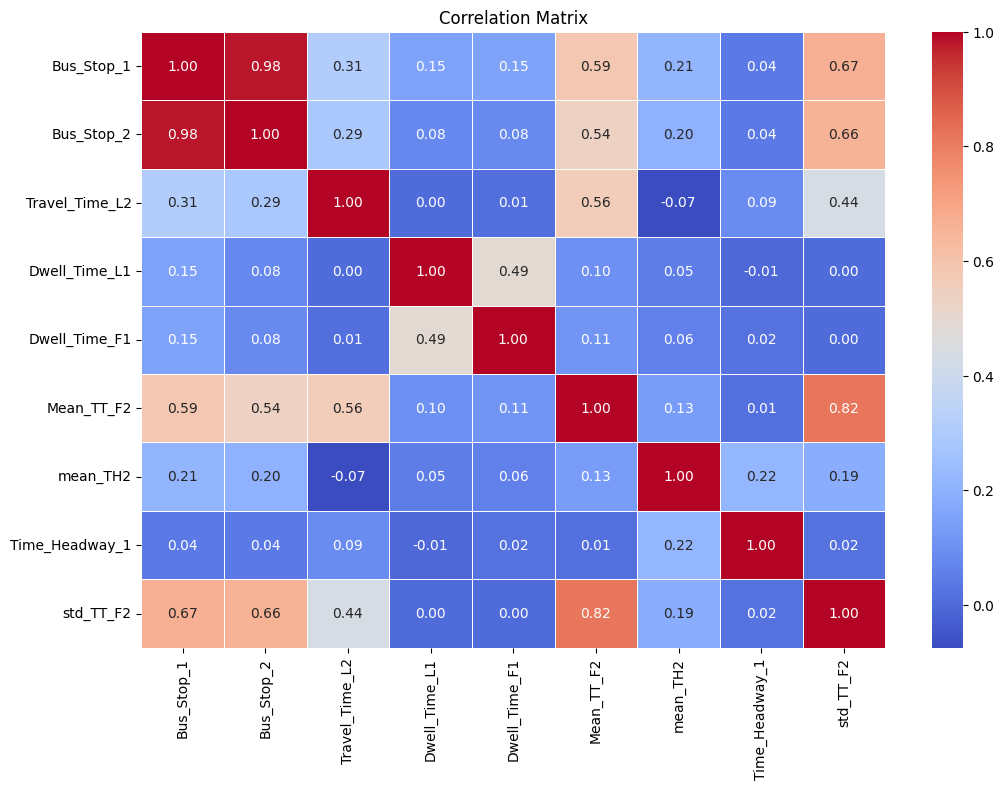

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Split the data into features (X) and target variable (Y)
X = df[['Bus_Stop_1', 'Bus_Stop_2', 'Travel_Time_L2', 'Dwell_Time_L1',
       'Dwell_Time_F1', 'Mean_TT_F2', 'mean_TH2','Time_Headway_1',
       'std_TT_F2']]
Y = df['Time_Headway_2']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor()

# Define the grid search parameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Perform grid search
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_result = grid_search.fit(X_train, Y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_result.best_params_)

# Make predictions on the test data using the best model
best_knn_regressor = grid_result.best_estimator_
Y_pred = best_knn_regressor.predict(X_test)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score:", r2)

# Make predictions on the entire dataset using the best model
Y_pred_entire_knn = best_knn_regressor.predict(X)
# Calculate R-squared (R2) score on the entire dataset
r2_entire = r2_score(Y, Y_pred_entire_knn)
print("R-squared Score on Entire Dataset:", r2_entire)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)
print("Adjusted R-squared Score:", adj_r2)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [35]:
import pandas as pd

# Create DataFrame df_pred with 'Time_Headway_2' column
df_pred_knn = pd.DataFrame(df['Time_Headway_2'])

# Add a new column 'Predicted_Time_Headway_2' with predicted values
df_pred_knn['Predicted_Time_Headway_2'] = Y_pred_entire_knn

df_pred_knn

Time_Headway_2  Predicted_Time_Headway_2
0         1173.00000               1168.801993
1         1219.00000               1219.000000
2         1209.00000               1209.000000
3         1211.00000               1211.000000
4         1205.00000               1205.000000
...              ...                       ...
3089      1421.00000               1421.000000
3090      1180.00000               1180.000000
3091      1102.00000               1102.000000
3092      1069.00000               1069.000000
3093      1227.72727               1227.727270

[3094 rows x 2 columns]

In [37]:
df_pred_knn.to_csv("E:\\1. Sem 3\\3. Results\\6. Final BB results apr 26th\\df_pred_BB_knn.csv")

In [22]:
df_1step_knn = pd.read_csv("E:\\1. Sem 3\\3. Results\\6. Final BB results apr 26th\\df_pred_BB_knn.csv")
df_1step_knn

Time_Headway_2  Predicted_Time_Headway_2  BB_actual  BB_pred
0         1173.00000                      1169          0        0
1         1219.00000                      1219          0        0
2         1209.00000                      1209          0        0
3         1211.00000                      1211          0        0
4         1205.00000                      1205          0        0
...              ...                       ...        ...      ...
3089      1421.00000                      1421          0        0
3090      1180.00000                      1180          0        0
3091      1102.00000                      1102          0        0
3092      1069.00000                      1069          1        1
3093      1227.72727                      1228          0        0

[3094 rows x 4 columns]

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming df is your DataFrame containing 'BB_actual' and 'BB_pred' columns
# Calculate accuracy
accuracy = accuracy_score(df_1step_knn['BB_actual'], df_1step_knn['BB_pred'])
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(df_1step_knn['BB_actual'], df_1step_knn['BB_pred'])
print("Precision:", precision)

# Calculate recall
recall = recall_score(df_1step_knn['BB_actual'], df_1step_knn['BB_pred'])
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(df_1step_knn['BB_actual'], df_1step_knn['BB_pred'])
print("F1-score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(df_1step_knn['BB_actual'], df_1step_knn['BB_pred'])
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9932126696832579
Precision: 0.9720670391061452
Recall: 0.9693593314763231
F1-score: 0.9707112970711297
Confusion Matrix:
[[2725   10]
 [  11  348]]


In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix
conf_matrix = [[2725, 10],
               [11, 348]]

# Define class labels
class_labels = ['Negative', 'Positive']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix
conf_matrix = [[2725, 10],
               [11, 348]]

# Define class labels
class_labels = ['Negative', 'Positive']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)  # Set font size for the title
plt.xticks(fontsize=12)  # Set font size for x-axis labels
plt.yticks(fontsize=12)  # Set font size for y-axis labels
plt.show()

In [159]:
import plotly.graph_objects as go

# Define the metrics and their corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [0.9932, 0.9720, 0.9693, 0.9707]
colors = ['blue', 'green', 'orange', 'red']

# Set the width of the bars
bar_width = 0.5

# Create a bar chart
fig = go.Figure(data=[go.Bar(x=metrics, y=values, marker_color=colors, width=bar_width)])

for metric, value in zip(metrics, values):
    fig.add_annotation(x=metric, y=value, text=str(value), showarrow=True, font=dict(size=24))


# Customize layout
fig.update_layout(
                  xaxis_title='Metrics',
                  yaxis_title='Values',
                  plot_bgcolor='rgba(0,0,0,0)',
                  paper_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Times New Roman', color='black', size=24),
                  xaxis=dict(showgrid=True),
                  yaxis=dict(showgrid=True),
                  )

# Show the plot
fig.show()

AUC: 0.982851512173262


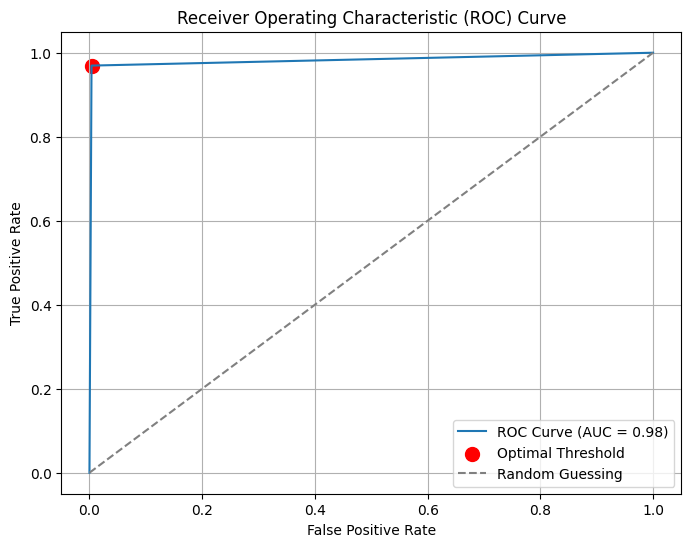

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'BB_actual' and 'BB_pred' columns
# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(df_1step_knn['BB_actual'], df_1step_knn['BB_pred'])

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(df_1step_knn['BB_actual'], df_1step_knn['BB_pred'])
print("AUC:", auc)

# Find the index of the threshold that maximizes Youden's J statistic
optimal_threshold_index = np.argmax(tpr - fpr)

# Get the optimal threshold value
optimal_threshold = thresholds[optimal_threshold_index]

# Plot ROC curve with optimal threshold point
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', label='Optimal Threshold', s=100)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming df is your DataFrame containing 'BB_actual' and 'BB_pred' columns
# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(df_1step_knn['BB_actual'], df_1step_knn['BB_pred'])

# Calculate Youden's J statistic for each threshold
youden_j = tpr - fpr

# Find the index of the threshold that maximizes Youden's J statistic
optimal_threshold_index = np.argmax(youden_j)

# Get the optimal threshold value
optimal_threshold = thresholds[optimal_threshold_index]

print("Optimal Threshold based on Youden's J statistic:", optimal_threshold)

Optimal Threshold based on Youden's J statistic: 1.0


Average Precision: 0.9458375234392524


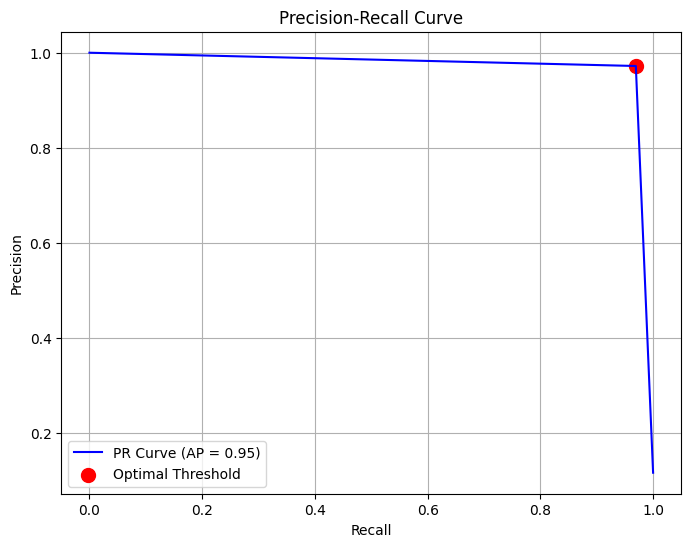

In [167]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'BB_actual' and 'BB_pred' columns
# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(df_1step_knn['BB_actual'], df_1step_knn['BB_pred'])

# Calculate average precision score
average_precision = average_precision_score(df_1step_knn['BB_actual'], df_1step_knn['BB_pred'])
print("Average Precision:", average_precision)

# Find the index of the threshold that maximizes precision-recall sum
optimal_threshold_index = np.argmax(precision + recall)

# Get the optimal threshold value
optimal_threshold = thresholds[optimal_threshold_index]

# Plot PR curve with optimal threshold point
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='PR Curve (AP = {:.2f})'.format(average_precision), color='b')
plt.scatter(recall[optimal_threshold_index], precision[optimal_threshold_index], color='red', label='Optimal Threshold', s=100)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [171]:
import plotly.graph_objects as go
import numpy as np

# Assuming precision, recall, and thresholds are already calculated

# Create the Precision-Recall curve trace
pr_curve_trace = go.Scatter(x=recall, y=precision, mode='lines', name='PR Curve (AP = {:.2f})'.format(average_precision), line=dict(color='blue'))

# Find the index of the threshold that maximizes precision-recall sum
optimal_threshold_index = np.argmax(precision + recall)

# Get the optimal threshold value
optimal_threshold_recall = recall[optimal_threshold_index]
optimal_threshold_precision = precision[optimal_threshold_index]

# Create a scatter plot for the optimal threshold point
optimal_threshold_trace = go.Scatter(x=[optimal_threshold_recall], y=[optimal_threshold_precision], mode='markers', 
                                     name='Optimal Threshold', marker=dict(color='red', size=10),
                                     text='Optimal Threshold ({:.2f}, {:.2f})'.format(optimal_threshold_recall, optimal_threshold_precision))

# Create layout
layout = go.Layout(title='Precision-Recall Curve',
                   xaxis=dict(title='Recall', tickfont=dict(size=14)),
                   yaxis=dict(title='Precision', tickfont=dict(size=14)),
                   showlegend=True,
                   legend=dict(x=0, y=1.0))

# Create figure
fig = go.Figure(data=[pr_curve_trace, optimal_threshold_trace], layout=layout)

# Show the plot
fig.show()

In [24]:
# Assuming df_1step is your DataFrame
count_of_ones = (df_1step_knn['BB_actual'] == 1).sum()
print("Number of occurrences where BB_actual is 1:", count_of_ones)

Number of occurrences where BB_actual is 1: 359


In [25]:
# Assuming df_1step is your DataFrame
count_of_ones = (df_1step_knn['BB_pred'] == 1).sum()
print("Number of occurrences where BB_pred is 1:", count_of_ones)

Number of occurrences where BB_pred is 1: 358


# 2 STEP

In [6]:
df3 = pd.read_csv("E:\\1. Sem 3\\3. Results\\5. Apr New Data\\4. Two step model_dataset\\2StepTT1-3added\\Hdmodeldatasetfinal2stepsTT_F1-3DTF2meansStd.csv")
df3

Bus_Stop_1  Bus_Stop_2  Bus_No_1  Bus_No_2  TT_L_1-3  Dwell_Time_L1  \
0              1           3       381      9526    159.54           8.46   
1              1           3      9526     20908    123.05           8.95   
2              1           3     20908     34197     99.28           8.72   
3              1           3     34197     48637    133.88           8.12   
4              1           3     48637     63874    134.01           8.99   
...          ...         ...       ...       ...       ...            ...   
3089          29          27     55212     70442    263.48          16.52   
3090          29          27     70442     85174    558.67          16.33   
3091          29          27     85174     99943    689.18          16.82   
3092          29          27     99943    114518    666.88          17.12   
3093          29          27    114518    128554    290.18          17.52   

      Bus_Stop_3  Time_Headway_1  Time_Headway_3  Mean_TT_F2  ...   ts  \
0              4      1186.00000      1150.00000   67.337500  ...  ts1   
1              4      1230.00000      1206.00000   67.337500  ...  ts1   
2              4      1187.00000      1221.00000   72.600000  ...  ts2   
3              4      1188.00000      1189.00000   89.352500  ...  ts3   
4              4      1207.00000      1229.00000   89.352500  ...  ts3   
...          ...             ...             ...         ...  ...  ...   
3089          28      1293.00000      1588.00000  242.612169  ...  ts5   
3090          28      1114.00000      1245.00000  293.551480  ...  ts6   
3091          28      1111.00000      1089.00000  236.427034  ...  ts7   
3092          28      1281.00000       904.70000  236.427034  ...  ts7   
3093          28      1227.72727      1227.72727  236.427034  ...  ts7   

      Travel_Time_F2  Travel_Time_F3   std_TT_F2  std_TT_F3 TT_F_1_3DTF2  \
0               65.0            67.0   11.455257  14.235874        123.1   
1               54.0            54.0   11.455257  14.235874         99.3   
2               76.0            66.0   21.573375  12.715097        133.9   
3               99.0            44.0   21.201983  14.686028        134.0   
4               97.0            68.0   21.201983  14.686028        156.3   
...              ...             ...         ...        ...          ...   
3089           311.0           264.0  177.994679  90.480340        558.7   
3090           377.0           329.0  133.943993  80.907296        689.2   
3091           368.0           316.0  129.925109  62.758048        666.9   
3092           156.0           151.7  129.925109  62.758048        290.2   
3093           156.0           151.7  129.925109  62.758048        290.8   

      std_TT_F1_3  mean_TT_F1_3  Travel_Time_L2  Time_Headway_2  
0       17.188293     99.672500            69.5      1173.00000  
1       17.188293     99.672500            56.1      1219.00000  
2       18.639615    125.950000            45.3      1209.00000  
3       22.774939    133.360000            67.9      1211.00000  
4       22.774939    133.360000            90.0      1205.00000  
...           ...           ...             ...             ...  
3089   213.870186    396.530000           166.5      1421.00000  
3090   167.367169    465.940909           294.7      1180.00000  
3091   147.796842    392.400000           360.2      1102.00000  
3092   147.796842    392.400000           350.9      1069.00000  
3093   147.796842    392.400000           138.5      1227.72727  

[3094 rows x 25 columns]

In [7]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Split the data into features (X) and target variable (Y)
X = df3[[  'Bus_Stop_1', 'Bus_Stop_2',
       'TT_L_1-3', 'Dwell_Time_L1', 'Bus_Stop_3', 'Time_Headway_1','mean_TH3',
        'Dwell_Time_F1',
        'std_TT_F1_3',
       'mean_TT_F1_3']]  # Exclude 'Target_Headway_3' column from features
Y = df3['Time_Headway_3']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=221)

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test data using the best model
best_xgb_regressor = grid_search.best_estimator_
Y_pred = best_xgb_regressor.predict(X_test)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score:", r2)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)
print("Adjusted R-squared Score:", adj_r2)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Y_predict = best_xgb_regressor.predict(X)
r2_Y = r2_score(Y,Y_predict)
print("R-squared Score on Entire Data:", r2_Y)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

mape_test = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE) :", mape_test)

Y_predict = best_xgb_regressor.predict(X)
r2_Y = r2_score(Y, Y_predict)
print("R-squared Score on Entire Data:", r2_Y)

# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
R-squared Score: 0.8099605165789932
Adjusted R-squared Score: 0.8068348671806214
Mean Squared Error: 4225.417371902199
Root Mean Squared Error: 65.00321047380814
R-squared Score on Entire Data: 0.8219873570509126
Mean Absolute Error: 35.2580176209991


NameError: name 'mean_absolute_percentage_error' is not defined

In [172]:
import plotly.graph_objects as go

# Define the metrics and their corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [0.9217, 0.8463, 0.7894, 0.8169]
colors = ['blue', 'green', 'orange', 'red']

# Set the width of the bars
bar_width = 0.5

# Create a bar chart
fig = go.Figure(data=[go.Bar(x=metrics, y=values, marker_color=colors, width=bar_width)])

# Add text annotations above each bar
for metric, value in zip(metrics, values):
    fig.add_annotation(x=metric, y=value, text=str(value), showarrow=True, font=dict(size=24))

# Customize layout
fig.update_layout(
    xaxis_title='Metrics',
    yaxis_title='Values',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(family='Times New Roman', color='black', size=24),
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
)

# Show the plot
fig.show()


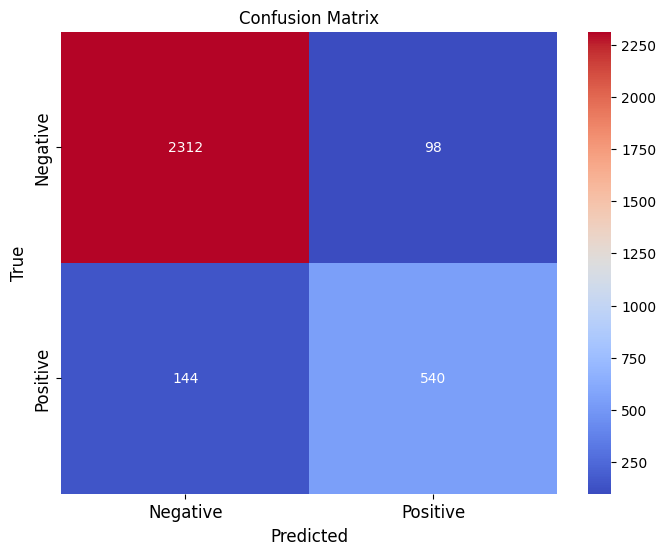

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix
conf_matrix = [[2312, 98],
               [144, 540]]

# Define class labels
class_labels = ['Negative', 'Positive']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)  # Set font size for the title
plt.xticks(fontsize=12)  # Set font size for x-axis labels
plt.yticks(fontsize=12)  # Set font size for y-axis labels
plt.show()

In [84]:
import pandas as pd

# Create DataFrame df_pred with 'Time_Headway_2' column
df_pred_xgb = pd.DataFrame(df3['Time_Headway_2'])

# Add a new column 'Predicted_Time_Headway_2' with predicted values
df_pred_xgb['Predicted_Time_Headway_2'] = Y_predict

df_pred_xgb

Time_Headway_2  Predicted_Time_Headway_2
0         1173.00000               1151.286255
1         1219.00000               1217.011963
2         1209.00000               1200.958740
3         1211.00000               1183.124146
4         1205.00000               1203.944336
...              ...                       ...
3089      1421.00000               1327.731567
3090      1180.00000               1114.438721
3091      1102.00000                991.621704
3092      1069.00000               1163.104492
3093      1227.72727               1197.104736

[3094 rows x 2 columns]

In [85]:
df_pred_xgb.to_csv("E:\\1. Sem 3\\3. Results\\6. Final BB results apr 26th\\df_pred_BB_xgb_2steps.csv")

In [36]:
df_pred_BB_xgb_2steps = pd.read_csv("E:\\1. Sem 3\\3. Results\\6. Final BB results apr 26th\\df_pred_BB_xgb_2steps.csv")
df_pred_BB_xgb_2steps

Time_Headway_2  Predicted_Time_Headway_2  BB_actual  BB_pred
0               1173                      1151          0        0
1               1219                      1217          0        0
2               1209                      1201          0        0
3               1211                      1183          0        0
4               1205                      1204          0        0
...              ...                       ...        ...      ...
3089            1421                      1328          0        0
3090            1180                      1114          0        1
3091            1102                       992          1        1
3092            1069                      1163          1        0
3093            1228                      1197          0        0

[3094 rows x 4 columns]

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming df is your DataFrame containing 'BB_actual' and 'BB_pred' columns
# Calculate accuracy
accuracy = accuracy_score(df_pred_BB_xgb_2steps['BB_actual'], df_pred_BB_xgb_2steps['BB_pred'])
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(df_pred_BB_xgb_2steps['BB_actual'], df_pred_BB_xgb_2steps['BB_pred'])
print("Precision:", precision)

# Calculate recall
recall = recall_score(df_pred_BB_xgb_2steps['BB_actual'], df_pred_BB_xgb_2steps['BB_pred'])
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(df_pred_BB_xgb_2steps['BB_actual'], df_pred_BB_xgb_2steps['BB_pred'])
print("F1-score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(df_pred_BB_xgb_2steps['BB_actual'], df_pred_BB_xgb_2steps['BB_pred'])
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9217840982546864
Precision: 0.8463949843260188
Recall: 0.7894736842105263
F1-score: 0.8169440242057489
Confusion Matrix:
[[2312   98]
 [ 144  540]]


In [42]:
import pandas as pd
df_new = pd.read_csv("E:\\1. Sem 3\\3. Results\\6. Final BB results apr 26th\\headway(AC-1 DN).csv")
df_new

date    stop                                           vehicles  \
0      02-11-2020    47.0  ('AC1:DN:WB050973_20201102154426', 'AC1:DN:WB0...   
1      02-11-2020    47.0  ('AC1:DN:WB050973_20201102131913', 'AC1:DN:WB0...   
2      02-11-2020    47.0  ('AC1:DN:WB050840_20201102113943', 'AC1:DN:WB0...   
3      02-11-2020    47.0  ('AC1:DN:WB050973_20201102105031', 'AC1:DN:WB0...   
4      02-11-2020    81.0  ('AC1:DN:WB050973_20201102154426', 'AC1:DN:WB0...   
...           ...     ...                                                ...   
25503  30-04-2021   266.0  ('AC1:DN:WB050956_20210430094716', 'AC1:DN:WB0...   
25504  30-04-2021   384.0  ('AC1:DN:WB050956_20210430094716', 'AC1:DN:WB0...   
25505  30-04-2021   465.0  ('AC1:DN:WB050769_20210430122423', 'AC1:DN:WB0...   
25506  30-04-2021  1340.0  ('AC1:DN:WB050956_20210430141004', 'AC1:DN:WB0...   
25507  30-04-2021  1340.0  ('AC1:DN:WB050956_20210430115514', 'AC1:DN:WB0...   

        headway mean_time  
0      00:26:54  10:42:45  
1      02:24:46  10:15:51  
2      01:39:51  07:51:04  
3      00:49:38  06:11:13  
4      00:22:49  11:07:33  
...         ...       ...  
25503  02:08:26  06:30:55  
25504  05:04:12  09:51:22  
25505  03:52:18  11:02:09  
25506  01:17:50  11:15:03  
25507  03:05:42  09:57:12  

[25508 rows x 5 columns]

In [43]:
unique_vehicle_count = df_new['vehicles'].nunique()
print("Number of unique values in the 'vehicle' column:", unique_vehicle_count)


Number of unique values in the 'vehicle' column: 7491


In [45]:
df_new.dtypes

date          object
stop         float64
vehicles      object
headway       object
mean_time     object
dtype: object

In [47]:
# Convert headway column to timedelta dtype
df_new['headway'] = pd.to_timedelta(df_new['headway'])

# Convert timedelta to total minutes
df_new['headway_minutes'] = df_new['headway'].dt.total_seconds() / 60

df_new

date    stop                                           vehicles  \
0      02-11-2020    47.0  ('AC1:DN:WB050973_20201102154426', 'AC1:DN:WB0...   
1      02-11-2020    47.0  ('AC1:DN:WB050973_20201102131913', 'AC1:DN:WB0...   
2      02-11-2020    47.0  ('AC1:DN:WB050840_20201102113943', 'AC1:DN:WB0...   
3      02-11-2020    47.0  ('AC1:DN:WB050973_20201102105031', 'AC1:DN:WB0...   
4      02-11-2020    81.0  ('AC1:DN:WB050973_20201102154426', 'AC1:DN:WB0...   
...           ...     ...                                                ...   
25503  30-04-2021   266.0  ('AC1:DN:WB050956_20210430094716', 'AC1:DN:WB0...   
25504  30-04-2021   384.0  ('AC1:DN:WB050956_20210430094716', 'AC1:DN:WB0...   
25505  30-04-2021   465.0  ('AC1:DN:WB050769_20210430122423', 'AC1:DN:WB0...   
25506  30-04-2021  1340.0  ('AC1:DN:WB050956_20210430141004', 'AC1:DN:WB0...   
25507  30-04-2021  1340.0  ('AC1:DN:WB050956_20210430115514', 'AC1:DN:WB0...   

              headway mean_time  headway_minutes  
0     0 days 00:26:54  10:42:45        26.900000  
1     0 days 02:24:46  10:15:51       144.766667  
2     0 days 01:39:51  07:51:04        99.850000  
3     0 days 00:49:38  06:11:13        49.633333  
4     0 days 00:22:49  11:07:33        22.816667  
...               ...       ...              ...  
25503 0 days 02:08:26  06:30:55       128.433333  
25504 0 days 05:04:12  09:51:22       304.200000  
25505 0 days 03:52:18  11:02:09       232.300000  
25506 0 days 01:17:50  11:15:03        77.833333  
25507 0 days 03:05:42  09:57:12       185.700000  

[25508 rows x 6 columns]

In [50]:
# Fill NaN values with a default value, for example, 0
df_new['headway_minutes'] = (df_new['headway'].dt.total_seconds() / 60).fillna(0).astype(int)

# Now, df_new will have the 'headway_minutes' column containing the rounded-off headway times in minutes as integers
print(df_new[['headway', 'headway_minutes']])


              headway  headway_minutes
0     0 days 00:26:54               26
1     0 days 02:24:46              144
2     0 days 01:39:51               99
3     0 days 00:49:38               49
4     0 days 00:22:49               22
...               ...              ...
25503 0 days 02:08:26              128
25504 0 days 05:04:12              304
25505 0 days 03:52:18              232
25506 0 days 01:17:50               77
25507 0 days 03:05:42              185

[25508 rows x 2 columns]


In [52]:
df_new

date    stop                                           vehicles  \
0      02-11-2020    47.0  ('AC1:DN:WB050973_20201102154426', 'AC1:DN:WB0...   
1      02-11-2020    47.0  ('AC1:DN:WB050973_20201102131913', 'AC1:DN:WB0...   
2      02-11-2020    47.0  ('AC1:DN:WB050840_20201102113943', 'AC1:DN:WB0...   
3      02-11-2020    47.0  ('AC1:DN:WB050973_20201102105031', 'AC1:DN:WB0...   
4      02-11-2020    81.0  ('AC1:DN:WB050973_20201102154426', 'AC1:DN:WB0...   
...           ...     ...                                                ...   
25503  30-04-2021   266.0  ('AC1:DN:WB050956_20210430094716', 'AC1:DN:WB0...   
25504  30-04-2021   384.0  ('AC1:DN:WB050956_20210430094716', 'AC1:DN:WB0...   
25505  30-04-2021   465.0  ('AC1:DN:WB050769_20210430122423', 'AC1:DN:WB0...   
25506  30-04-2021  1340.0  ('AC1:DN:WB050956_20210430141004', 'AC1:DN:WB0...   
25507  30-04-2021  1340.0  ('AC1:DN:WB050956_20210430115514', 'AC1:DN:WB0...   

              headway mean_time  headway_minutes  
0     0 days 00:26:54  10:42:45               26  
1     0 days 02:24:46  10:15:51              144  
2     0 days 01:39:51  07:51:04               99  
3     0 days 00:49:38  06:11:13               49  
4     0 days 00:22:49  11:07:33               22  
...               ...       ...              ...  
25503 0 days 02:08:26  06:30:55              128  
25504 0 days 05:04:12  09:51:22              304  
25505 0 days 03:52:18  11:02:09              232  
25506 0 days 01:17:50  11:15:03               77  
25507 0 days 03:05:42  09:57:12              185  

[25358 rows x 6 columns]

In [58]:
(df_new['headway_minutes']<30).sum()

8334

In [57]:
df_new['headway_minutes'].mean()

76.87081000078871

In [177]:
df_new.to_csv("E:\\1. Sem 3\\3. Results\\6. Final BB results apr 26th\\headway_data_new.csv")

In [9]:
df_bb = pd.read_excel("E:\\1. Sem 3\\3. Results\\6. Final BB results apr 26th\\headway_data_new.xlsx")
df_bb

date  stop                                           vehicles  \
0     2020-11-02    47  ('AC1:DN:WB050973_20201102154426', 'AC1:DN:WB0...   
1     2020-11-02    47  ('AC1:DN:WB050973_20201102131913', 'AC1:DN:WB0...   
2     2020-11-02    47  ('AC1:DN:WB050840_20201102113943', 'AC1:DN:WB0...   
3     2020-11-02    47  ('AC1:DN:WB050973_20201102105031', 'AC1:DN:WB0...   
4     2020-11-02    81  ('AC1:DN:WB050973_20201102154426', 'AC1:DN:WB0...   
...          ...   ...                                                ...   
25353 2021-04-30   266  ('AC1:DN:WB050956_20210430094716', 'AC1:DN:WB0...   
25354 2021-04-30   384  ('AC1:DN:WB050956_20210430094716', 'AC1:DN:WB0...   
25355 2021-04-30   465  ('AC1:DN:WB050769_20210430122423', 'AC1:DN:WB0...   
25356 2021-04-30  1340  ('AC1:DN:WB050956_20210430141004', 'AC1:DN:WB0...   
25357 2021-04-30  1340  ('AC1:DN:WB050956_20210430115514', 'AC1:DN:WB0...   

               headway mean_time  headway_minutes  bunching  
0      0 days 00:26:54  10:42:45               26         0  
1      0 days 02:24:46  10:15:51              144         0  
2      0 days 01:39:51  07:51:04               99         0  
3      0 days 00:49:38  06:11:13               49         0  
4      0 days 00:22:49  11:07:33               22         0  
...                ...       ...              ...       ...  
25353  0 days 02:08:26  06:30:55              128         0  
25354  0 days 05:04:12  09:51:22              304         0  
25355  0 days 03:52:18  11:02:09              232         0  
25356  0 days 01:17:50  11:15:03               77         0  
25357  0 days 03:05:42  09:57:12              185         0  

[25358 rows x 7 columns]

In [10]:
import pandas as pd

# Assuming df_bb is your DataFrame containing 'stop' and 'bunching' columns

# Group by 'stop' and 'bunching', then sum the occurrences of bunching
bunching_counts = df_bb.groupby(['stop', 'bunching']).size().unstack(fill_value=0)

# Reset index for better visualization
bunching_counts.reset_index(inplace=True)

# Display the resulting DataFrame
bunching_counts

bunching  stop    0   1
0            1    0   1
1           16   11   5
2           24    0   1
3           25    2   0
4           31    1   0
..         ...  ...  ..
124       2978  150   9
125       2997  232  22
126       3037    5   2
127       3039  267  21
128       3040   55   2

[129 rows x 3 columns]

In [11]:
# Calculate the probability of bunching at each stop
bunching_counts['bunching_probability'] = bunching_counts[1] / (bunching_counts[0] + bunching_counts[1])

# Display the updated DataFrame
print(bunching_counts)

bunching  stop    0   1  bunching_probability
0            1    0   1              1.000000
1           16   11   5              0.312500
2           24    0   1              1.000000
3           25    2   0              0.000000
4           31    1   0              0.000000
..         ...  ...  ..                   ...
124       2978  150   9              0.056604
125       2997  232  22              0.086614
126       3037    5   2              0.285714
127       3039  267  21              0.072917
128       3040   55   2              0.035088

[129 rows x 4 columns]


In [12]:
# Filter out rows with bunching probability equal to 1.00
bunching_counts_filtered = bunching_counts[bunching_counts['bunching_probability'] != 1.00]

# Display the filtered DataFrame
print(bunching_counts_filtered)

bunching  stop    0   1  bunching_probability
1           16   11   5              0.312500
3           25    2   0              0.000000
4           31    1   0              0.000000
5           47  550  35              0.059829
6           53    1   1              0.500000
..         ...  ...  ..                   ...
124       2978  150   9              0.056604
125       2997  232  22              0.086614
126       3037    5   2              0.285714
127       3039  267  21              0.072917
128       3040   55   2              0.035088

[125 rows x 4 columns]


In [13]:
bunching_counts_filtered.to_csv("E:\\1. Sem 3\\3. Results\\6. Final BB results apr 26th\\bunching_result_prob_5mins.csv")